In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [67]:
df = pd.read_csv('survey lung cancer.csv')

In [68]:
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [69]:
print(df.duplicated().sum())
print(df.shape)

33
(309, 16)


In [70]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
print(df.shape)

0
(276, 16)


In [71]:
X = df.iloc[0:,:len(df.columns)-1]
Y = df.iloc[:,-1]
print(Y.value_counts())

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64


<Axes: ylabel='count'>

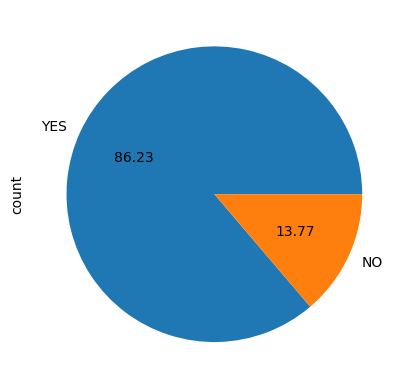

In [72]:
Y.value_counts().plot.pie(autopct="%.2f")

LUNG_CANCER
YES    238
NO     238
Name: count, dtype: int64


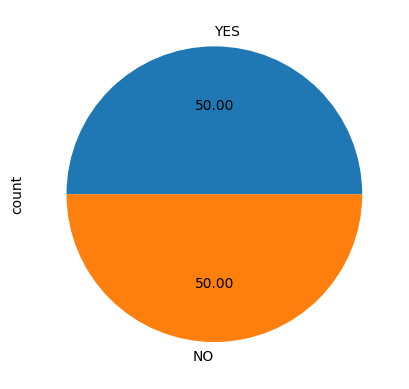

In [73]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")

X, Y = ros.fit_resample(X,Y)
Y.value_counts().plot.pie(autopct="%.2f")
print(Y.value_counts())

In [74]:
Y = Y.replace({"YES":1,"NO":0})
X = X.replace({1:0,2:1})
X["GENDER"] = X["GENDER"].replace({"M":0,"F":1})
print(X,Y)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        0               1        1              0   
1         0   74        1               0        0              0   
2         1   59        0               0        0              1   
3         0   63        1               1        1              0   
4         1   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
471       1   55        1               0        1              0   
472       1   57        1               1        0              0   
473       0   61        0               0        1              1   
474       1   57        1               1        0              0   
475       1   71        1               0        0              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1     

In [75]:
test_sample = 100

X_train = X[test_sample:]
Y_train = Y[test_sample:]

X_test = X[:test_sample]
Y_test = Y[:test_sample]
print(X_train.shape,Y_train.shape)

(376, 15) (376,)


In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear").fit(X_train,Y_train)

print("Score the X-train with Y-train is : {}%".format(LO_model.score(X_train,Y_train)*100))
print("Score the X-test with Y-test is : {}%".format(LO_model.score(X_test,Y_test)*100))
print(X_test.columns)
Y_pred = model.predict(X_test)
print(Y_pred.shape)

Score the X-train with Y-train is : 89.8936170212766%
Score the X-test with Y-test is : 88.0%
Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')
(100,)


In [77]:
sample = X_test.sample(1)
print(sample)
UI_pred = model.predict(sample)
print(UI_pred,"\n","True Pred:!", Y_test[sample.index])

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
44       1   70        1               1        0              1   

    CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
44                1         0         0         0                  1   

    COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
44         1                    0                      1           0  
[1] 
 True Pred:! 44    1
Name: LUNG_CANCER, dtype: int64


In [78]:
import pickle
filename = 'Model.Lung'
pickle.dump(model, open(filename, 'wb'))

In [79]:
filename = 'Model.Lung'
model = pickle.load(open(filename, 'rb'))
print(model)

LogisticRegression(solver='liblinear')


In [80]:
input_data = ([[1,60,1,1,2,2,2,1,1,1,2,1,1,1,1]])
modelPrediction = model.predict(input_data)

print(modelPrediction)

if(modelPrediction == 1):
    print("Yes You are a Lung Cancer patient")
else:
    print("No You are not affected by Lung Cancer")

[1]
Yes You are a Lung Cancer patient


C:\Users\SAYAN\Desktop\Cancer Prediction\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
